# Phase 2: Self-Organized Criticality (SOC) Analysis

This notebook analyzes Phase 2 experiment results which test the SOC hypothesis:
**Do prey populations evolve toward a critical point regardless of their starting conditions?**

## Experiment Designs
- Run simulations with **evolution enabled** (`with_evolution=True`)
- Start from **different initial prey_death values** (0.0 to 0.2)
- Track whether all runs **converge** to the same critical prey_death (~0.0963)

In [1]:
# Setup: Add project root to path and import analysis functions
import sys
from pathlib import Path

# Add scripts directory to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "scripts"))

# Import analysis functions
from analysis import load_phase2_results, plot_phase2_soc_analysis

# Other imports
import numpy as np
import matplotlib.pyplot as plt
import json

# Configure matplotlib for notebook display
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['figure.dpi'] = 100

print(f"Project root: {project_root}")
print("✓ Analysis functions imported successfully")


Project root: /Users/saryabou/Documents/GitHub/Complex_Systems_Simulation/CSS_Project
✓ Analysis functions imported successfully


## Load Phase 2 Results

Load the Phase 2 experiment results from the HPC data directory.


In [2]:
# Define the path to your Phase 2 results
# Update this path if your data is in a different location
results_dir = project_root / "hpc_data" / "phase2_18693004"

# Load the results
results = load_phase2_results(results_dir)
print(f"✓ Loaded {len(results)} simulation results")

# Quick peek at the data structure
print(f"\nSample result keys: {list(results[0].keys())[:10]}...")
print(f"\nInitial prey_death values in data:")
initial_pds = sorted(set(r['prey_death'] for r in results))
print(f"  {initial_pds}")


✓ Loaded 200 simulation results

Sample result keys: ['prey_birth', 'prey_death', 'predator_birth', 'predator_death', 'grid_size', 'with_evolution', 'seed', 'prey_mean', 'prey_std', 'pred_mean']...

Initial prey_death values in data:
  [0.0, 0.010526315789473684, 0.021052631578947368, 0.031578947368421054, 0.042105263157894736, 0.05263157894736842, 0.06315789473684211, 0.07368421052631578, 0.08421052631578947, 0.09473684210526316, 0.10526315789473684, 0.11578947368421053, 0.12631578947368421, 0.1368421052631579, 0.14736842105263157, 0.15789473684210525, 0.16842105263157894, 0.17894736842105263, 0.18947368421052632, 0.2]


## SOC Analysis Visualization

Generate the 4-panel SOC analysis figure:
1. **Convergence Plot**: Initial vs Final prey_death (main SOC test)
2. **Distribution**: Histogram of final evolved values
3. **Population vs Trait**: Final prey_death vs equilibrium population
4. **Boxplot**: Convergence by initial condition


In [3]:
# Extract data from results
initial_pd = np.array([r['prey_death'] for r in results if r.get('evolved_prey_death_final') is not None])
final_pd = np.array([r['evolved_prey_death_final'] for r in results if r.get('evolved_prey_death_final') is not None])
prey_pops = np.array([r['prey_mean'] for r in results if r.get('evolved_prey_death_final') is not None])

# Reference: expected critical prey death rate
critical_prey_death = 0.0963

# Get unique initial values
unique_initial = np.unique(initial_pd)

print(f"Data points: {len(initial_pd)}")
print(f"Unique initial conditions: {len(unique_initial)}")
print(f"Replicates per condition: {len(initial_pd) // len(unique_initial)}")


Data points: 200
Unique initial conditions: 20
Replicates per condition: 10


/var/folders/vm/t3wxkm516_b_b9g879dflw400000gn/T/ipykernel_8027/3865389797.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', fontsize=9)
/var/folders/vm/t3wxkm516_b_b9g879dflw400000gn/T/ipykernel_8027/3865389797.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=boxplot_labels, patch_artist=True)
/var/folders/vm/t3wxkm516_b_b9g879dflw400000gn/T/ipykernel_8027/3865389797.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', fontsize=9)


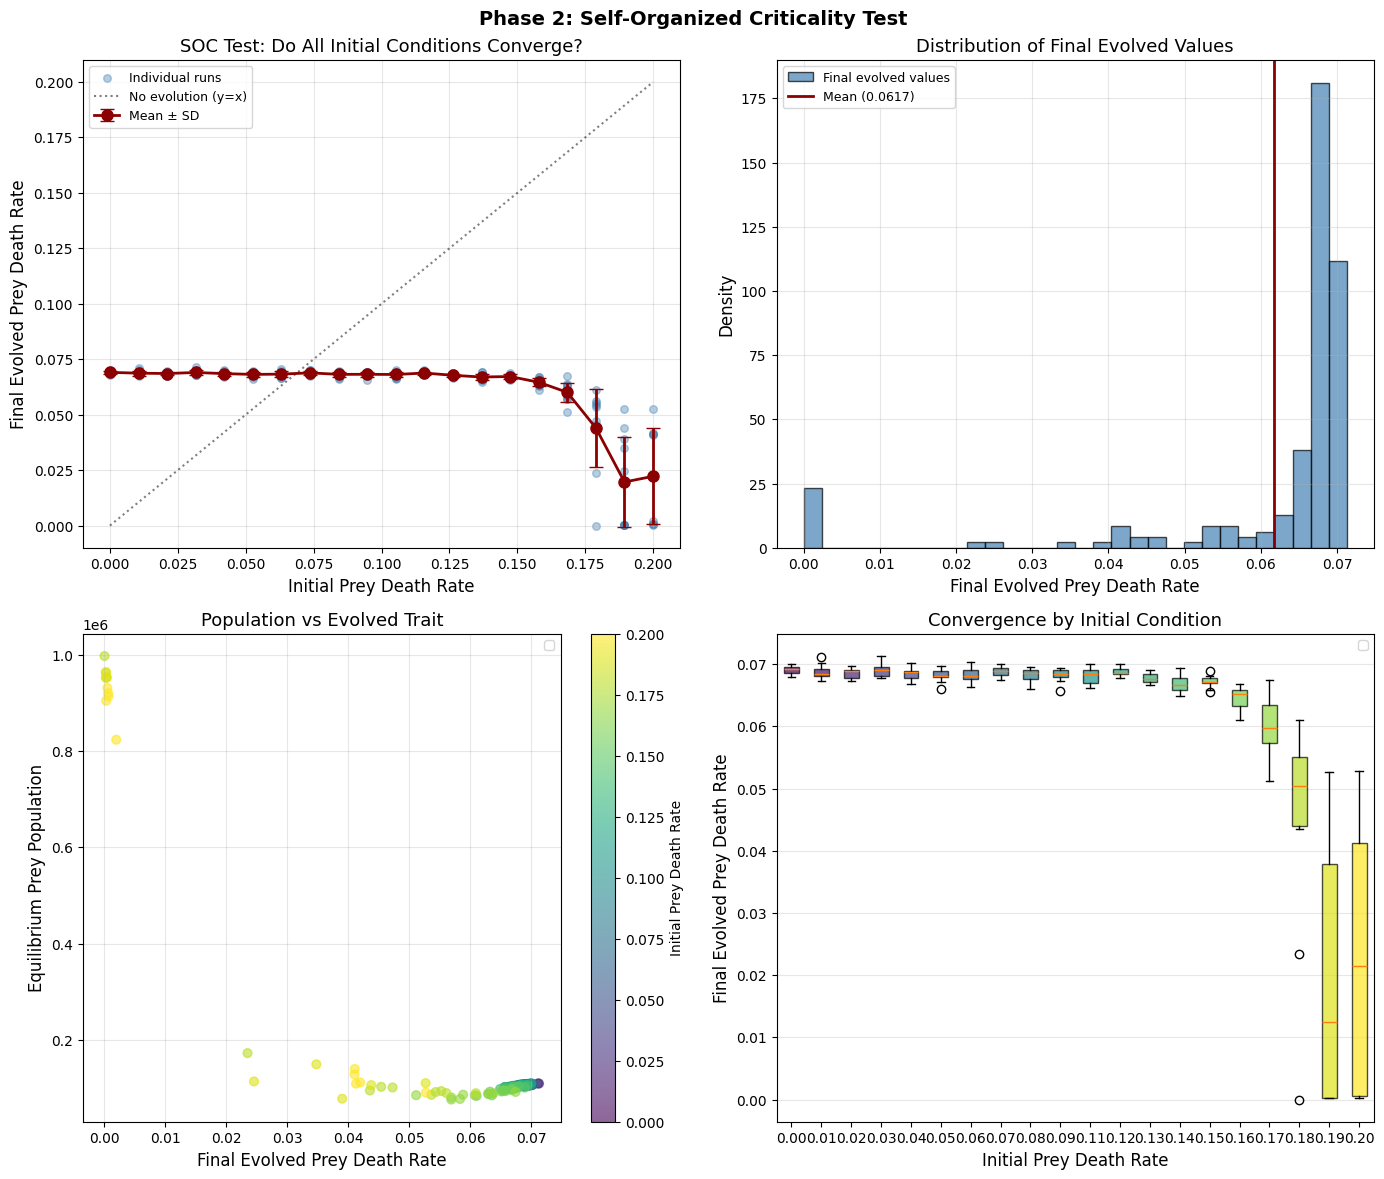

In [ ]:
# Create the 4-panel SOC analysis figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Phase 2: Self-Organized Criticality Test", fontsize=14, fontweight='bold')

# =============================================================================
# Panel 1: Convergence Plot (Main SOC Test)
# =============================================================================
ax = axes[0, 0]

# Plot individual replicates as scatter
ax.scatter(initial_pd, final_pd, alpha=0.4, s=30, c='steelblue', label='Individual runs')

# Plot mean ± std for each initial value
means = [np.mean(final_pd[initial_pd == iv]) for iv in unique_initial]
stds = [np.std(final_pd[initial_pd == iv]) for iv in unique_initial]

ax.errorbar(unique_initial, means, yerr=stds, fmt='o-', color='darkred', 
            linewidth=2, markersize=8, capsize=5, label='Mean ± SD')

# Reference lines
# ax.axhline(critical_prey_death, color='green', linestyle='--', linewidth=2,
#            label=f'Critical point ({critical_prey_death})')
ax.plot([0, 0.2], [0, 0.2], 'k:', alpha=0.5, label='No evolution (y=x)')

ax.set_xlabel("Initial Prey Death Rate", fontsize=12)
ax.set_ylabel("Final Evolved Prey Death Rate", fontsize=12)
ax.set_title("SOC Test: Do All Initial Conditions Converge?", fontsize=13)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.01, 0.21)
ax.set_ylim(-0.01, 0.21)

# =============================================================================
# Panel 2: Distribution of Final Evolved Values
# =============================================================================
ax = axes[0, 1]

ax.hist(final_pd, bins=30, density=True, alpha=0.7, color='steelblue', 
        edgecolor='black', label='Final evolved values')

# ax.axvline(critical_prey_death, color='green', linestyle='--', linewidth=2,
#            label=f'Critical point ({critical_prey_death})')

final_mean = np.mean(final_pd)
ax.axvline(final_mean, color='darkred', linestyle='-', linewidth=2,
           label=f'Mean ({final_mean:.4f})')

ax.set_xlabel("Final Evolved Prey Death Rate", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.set_title("Distribution of Final Evolved Values", fontsize=13)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

# =============================================================================
# Panel 3: Final Prey Death vs Population
# =============================================================================
ax = axes[1, 0]

scatter = ax.scatter(final_pd, prey_pops, c=initial_pd, cmap='viridis', 
                     alpha=0.6, s=40)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Initial Prey Death Rate', fontsize=10)

# ax.axvline(critical_prey_death, color='green', linestyle='--', linewidth=2,
#            label=f'Critical point')

ax.set_xlabel("Final Evolved Prey Death Rate", fontsize=12)
ax.set_ylabel("Equilibrium Prey Population", fontsize=12)
ax.set_title("Population vs Evolved Trait", fontsize=13)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

# =============================================================================
# Panel 4: Boxplot of Final Values by Initial Condition
# =============================================================================
ax = axes[1, 1]

boxplot_data = [final_pd[initial_pd == iv] for iv in unique_initial]
boxplot_labels = [f'{iv:.2f}' for iv in unique_initial]

bp = ax.boxplot(boxplot_data, labels=boxplot_labels, patch_artist=True)

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_initial)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel("Initial Prey Death Rate", fontsize=12)
ax.set_ylabel("Final Evolved Prey Death Rate", fontsize=12)
ax.set_title("Convergence by Initial Condition", fontsize=13)
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Bifurcation Diagram: Evolved Prey Death vs Initial Condition

A bifurcation-style visualization showing how the final evolved prey death rate varies with the initial prey death rate (control parameter). If SOC holds, all trajectories should converge to a single attractor regardless of initial condition.


## Summary Statistics

Calculate key metrics to evaluate the SOC hypothesis.


In [5]:
# Summary statistics
print("=" * 60)
print("PHASE 2 SOC ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n📊 Overall Statistics:")
print(f"   Total simulations: {len(final_pd)}")
print(f"   Initial conditions tested: {len(unique_initial)}")
print(f"   Replicates per condition: {len(final_pd) // len(unique_initial)}")

print(f"\n🎯 Final Evolved Prey Death Rate:")
print(f"   Mean:   {np.mean(final_pd):.4f}")
print(f"   Std:    {np.std(final_pd):.4f}")
print(f"   Median: {np.median(final_pd):.4f}")
print(f"   Range:  [{np.min(final_pd):.4f}, {np.max(final_pd):.4f}]")

print(f"\n📍 Reference Critical Point: {critical_prey_death}")
print(f"   Distance from critical: {abs(np.mean(final_pd) - critical_prey_death):.4f}")

# Check convergence: low variance across different initial conditions
convergence_achieved = np.std(final_pd) < 0.02
print(f"\n✓ Convergence achieved: {convergence_achieved} (std < 0.02)")

print(f"\n📈 Per-Condition Statistics:")
print("-" * 50)
print(f"{'Initial PD':<12} {'Mean':<10} {'Std':<10} {'N':<6}")
print("-" * 50)
for iv in unique_initial:
    mask = initial_pd == iv
    mean_val = np.mean(final_pd[mask])
    std_val = np.std(final_pd[mask])
    n_val = np.sum(mask)
    print(f"{iv:<12.3f} {mean_val:<10.4f} {std_val:<10.4f} {n_val:<6}")
print("-" * 50)


PHASE 2 SOC ANALYSIS SUMMARY

📊 Overall Statistics:
   Total simulations: 200
   Initial conditions tested: 20
   Replicates per condition: 10

🎯 Final Evolved Prey Death Rate:
   Mean:   0.0617
   Std:    0.0167
   Median: 0.0679
   Range:  [0.0000, 0.0713]

📍 Reference Critical Point: 0.0963
   Distance from critical: 0.0346

✓ Convergence achieved: True (std < 0.02)

📈 Per-Condition Statistics:
--------------------------------------------------
Initial PD   Mean       Std        N     
--------------------------------------------------
0.000        0.0691     0.0006     10    
0.011        0.0687     0.0011     10    
0.021        0.0686     0.0008     10    
0.032        0.0690     0.0011     10    
0.042        0.0685     0.0010     10    
0.053        0.0682     0.0010     10    
0.063        0.0683     0.0012     10    
0.074        0.0688     0.0008     10    
0.084        0.0682     0.0011     10    
0.095        0.0682     0.0011     10    
0.105        0.0681     0.0012     

## Interpretation Guide

### What to Look For

**SOC Supported** ✅ if:
- All initial conditions converge to similar final prey_death values
- The distribution of final values is narrow (low std)
- Final values cluster near the theoretical critical point (~0.0963)

**SOC Not Supported** ❌ if:
- Final values remain close to initial values (points near y=x line)
- Large variance in final values
- No convergence toward critical point

### Key Metrics
- **Mean final prey_death**: Should be close to 0.0963 if SOC holds
- **Standard deviation**: Should be small (<0.02) indicating convergence
- **Per-condition means**: Should all be similar regardless of starting point
